In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [14]:
from sklearn.datasets import make_classification
X,y= make_classification(n_samples=1000 , n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

<Axes: >

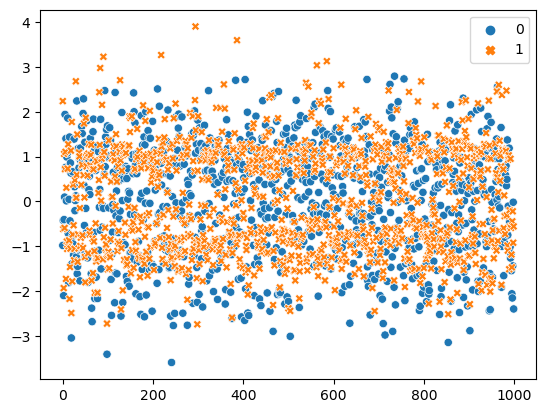

In [15]:
sns.scatterplot(pd.DataFrame(X))

In [16]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25 , random_state=10)

In [17]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [18]:
y_pred = svc.predict(X_test)

In [19]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       124
           1       0.95      0.94      0.94       126

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[118   6]
 [  8 118]]


In [20]:
rbf = SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred = rbf.predict(X_test)

In [21]:
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       124
           1       0.98      0.96      0.97       126

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

[[122   2]
 [  5 121]]


In [22]:
poly = SVC(kernel='poly')
poly.fit(X_train,y_train)
y_pred = poly.predict(X_test)

In [23]:
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       124
           1       1.00      0.87      0.93       126

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[124   0]
 [ 16 110]]


In [24]:
sig = SVC(kernel='sigmoid')
sig.fit(X_train,y_train)
y_pred = sig.predict(X_test)


In [25]:
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       124
           1       0.90      0.87      0.89       126

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250

[[112  12]
 [ 16 110]]


In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
'C':[0.1,1,10,100,1000],
'gamma':[1,0.1,0.01,0.001,0.0001],
'kernel':['rbf']
}
grid = GridSearchCV(SVC() , param_grid=param_grid , refit=True , cv=5,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [29]:
grid.best_estimator_
y_pred = grid.predict(X_test)
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       124
           1       0.98      0.94      0.96       126

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[122   2]
 [  8 118]]
